**Wavelet denoising**

In [24]:
# ===================================================================
# BAGIAN 1: IMPORT LIBRARY
# ===================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings('ignore')
print("✅ Library yang dibutuhkan siap.")

✅ Library yang dibutuhkan siap.


In [25]:
# ===================================================================
# BAGIAN 2: MEMUAT DATA DAN KONFIGURASI
# ===================================================================
WINDOW_SIZE = 2048
WAVELET_TYPE = 'db4'
WAVELET_LEVEL = 4

try:
    df_ecg = pd.read_csv('mitbih_100_signals (1).csv')
    df_noise = pd.read_csv('nstdb_em_signal.csv')

    clean_signal = df_ecg['MLII'].values
    noise = df_noise['noise1'].values

    min_len = min(len(clean_signal), len(noise))
    clean_signal = clean_signal[:min_len]
    noise = noise[:min_len]

    noisy_signal = clean_signal + noise * 0.3

    print(f"✅ Data siap: {len(clean_signal)} sampel sinyal bersih dan bernoise.")

except FileNotFoundError as e:
    print(f"❌ ERROR: Pastikan file CSV ada di folder yang sama. File tidak ditemukan: {e.filename}")
    exit()


✅ Data siap: 650000 sampel sinyal bersih dan bernoise.


In [26]:
# ===================================================================
# BAGIAN 3: SEGMENTASI DAN TRANSFORMASI WAVELET
# ===================================================================
print("\n--- Memulai Segmentasi dan Transformasi Wavelet ---")

def create_windows(signal, window_size):
    windows = []
    for i in range(0, len(signal) - window_size + 1, window_size):
        windows.append(signal[i:i + window_size])
    return np.array(windows)

clean_windows = create_windows(clean_signal, WINDOW_SIZE)
noisy_windows = create_windows(noisy_signal, WINDOW_SIZE)

def transform_windows(windows, wavelet, level):
    all_coeffs = []
    for window in windows:
        coeffs = pywt.wavedec(window, wavelet, level=level)
        coeffs_arr, _ = pywt.coeffs_to_array(coeffs)
        all_coeffs.append(coeffs_arr)
    return np.array(all_coeffs)

X_train = transform_windows(noisy_windows, WAVELET_TYPE, WAVELET_LEVEL)
y_train = transform_windows(clean_windows, WAVELET_TYPE, WAVELET_LEVEL)

print(f"✅ Data telah disegmentasi dan ditransformasi ke bentuk koefisien wavelet.")
print(f"Bentuk data training (X_train): {X_train.shape}")


--- Memulai Segmentasi dan Transformasi Wavelet ---
✅ Data telah disegmentasi dan ditransformasi ke bentuk koefisien wavelet.
Bentuk data training (X_train): (317, 2074)


In [30]:
# ===================================================================
# BAGIAN 4: MEMBUAT DAN MELATIH MODEL NEURAL NETWORK
# ===================================================================
input_dim = X_train.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

print("\n--- Memulai Training Model ---")
history = model.fit(X_train, y_train, epochs=69, batch_size=32, validation_split=0.1, verbose=1)
print("✅ Training Selesai.")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │       265,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2074)           │       267,546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,722 (2.10 MB)

 Trainable params: 549,722 (2.10 MB)

 Non-trainable params: 0 (0.00 B)


--- Memulai Training Model ---
Epoch 1/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1359 - val_loss: 0.1095
Epoch 2/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0801 - val_loss: 0.0550
Epoch 3/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0499 - val_loss: 0.0505
Epoch 4/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0442 - val_loss: 0.0455
Epoch 5/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0420 - val_loss: 0.0456
Epoch 6/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0404 - val_loss: 0.0442
Epoch 7/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403 - val_loss: 0.0444
Epoch 8/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - val_loss: 0.0443
Epoch 9/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 10/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 11/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - val_loss: 0.0441
Epoch 12/69
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - l


--- Melakukan Denoising pada Keseluruhan Sinyal ---
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


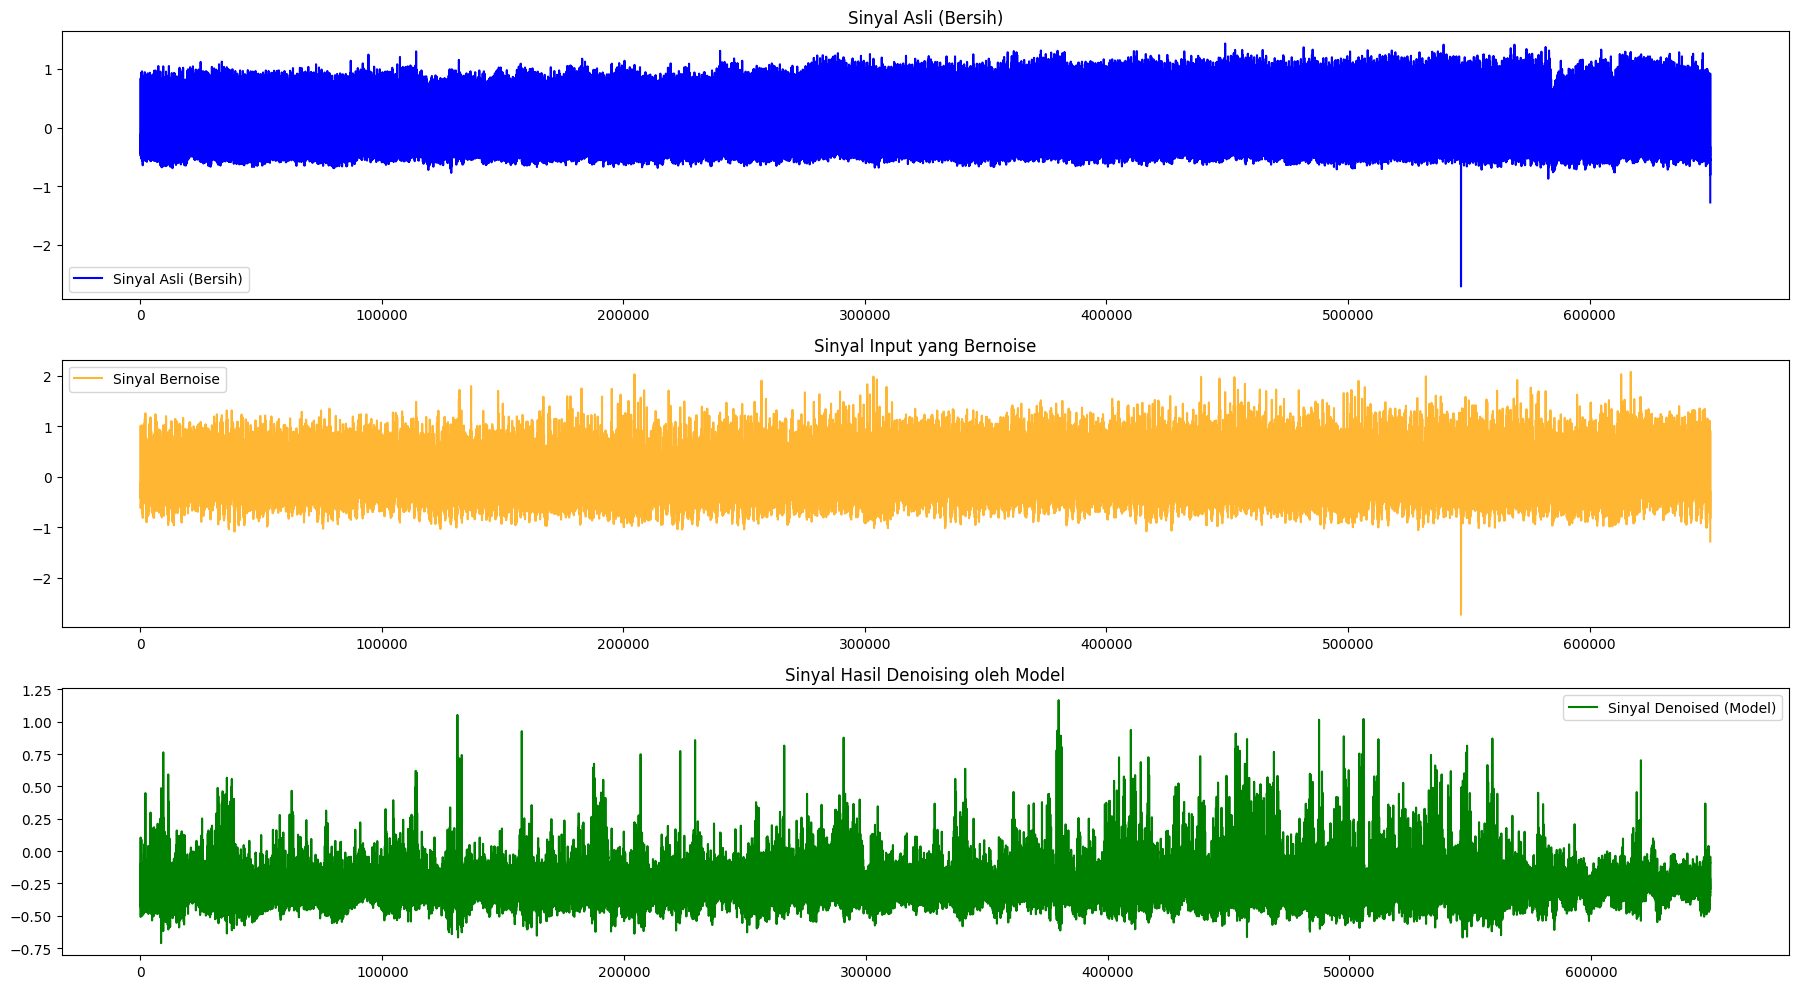

In [31]:
# ===================================================================
# BAGIAN 5: DENOISING KESELURUHAN SINYAL DAN VISUALISASI
# ===================================================================
print("\n--- Melakukan Denoising pada Keseluruhan Sinyal ---")

predicted_coeffs_all = model.predict(X_train)
denoised_signal_parts = []
_, coeff_slices = pywt.coeffs_to_array(pywt.wavedec(clean_windows[0], WAVELET_TYPE, level=WAVELET_LEVEL))

for coeffs_flat in predicted_coeffs_all:
    coeffs = pywt.array_to_coeffs(coeffs_flat, coeff_slices, output_format='wavedec')
    denoised_part = pywt.waverec(coeffs, WAVELET_TYPE)
    denoised_signal_parts.append(denoised_part)

denoised_signal_model = np.concatenate(denoised_signal_parts)

# Potong sinyal asli agar panjangnya sama persis dengan hasil denoising untuk perbandingan
clean_signal_for_comparison = clean_signal[:len(denoised_signal_model)]

# --- Visualisasi Hasil ---
plt.figure(figsize=(18, 10))
plt.subplot(3, 1, 1)
plt.plot(clean_signal, label='Sinyal Asli (Bersih)', color='blue')
plt.title('Sinyal Asli (Bersih)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(noisy_signal, label='Sinyal Bernoise', color='orange', alpha=0.8)
plt.title('Sinyal Input yang Bernoise')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(denoised_signal_model, label='Sinyal Denoised (Model)', color='green')
plt.title('Sinyal Hasil Denoising oleh Model')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# ===================================================================
# BAGIAN 6: EVALUASI HASIL KUANTITATIF
# ===================================================================
def calculate_rmse(original, denoised):
    """Menghitung Root Mean Squared Error."""
    return np.sqrt(np.mean((original - denoised) ** 2))

def calculate_prd(original, denoised):
    """Menghitung Percentage Root-mean-square Difference."""
    return np.sqrt(np.sum((original - denoised) ** 2) / np.sum(original ** 2)) * 100

# Hitung metrik
rmse = calculate_rmse(clean_signal_for_comparison, denoised_signal_model)
prd = calculate_prd(clean_signal_for_comparison, denoised_signal_model)

print("\n--- Hasil Kuantitatif Model Denoising ---")
print("---------------------------------------------")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Percentage Root-Difference (PRD): {prd:.2f}%")
print("---------------------------------------------")
print("Interpretasi: Semakin kecil nilai RMSE dan PRD, semakin baik performa model.")


--- Hasil Kuantitatif Model Denoising ---
---------------------------------------------
Root Mean Squared Error (RMSE): 0.1634
Percentage Root-Difference (PRD): 45.12%
---------------------------------------------
Interpretasi: Semakin kecil nilai RMSE dan PRD, semakin baik performa model.
